In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore") 

print("="*30)
print("Requiered Libraries Imported")
print("="*30)

Requiered Libraries Imported


In [36]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [37]:
train.head(5)

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [38]:
test.head(5)

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,630000,58,1,3,120,288,0,2,145,1,0.8,2,3,3
1,630001,55,0,2,120,209,0,0,172,0,0.0,1,0,3
2,630002,54,1,4,120,268,0,0,150,1,0.0,2,3,7
3,630003,44,0,3,112,177,0,0,168,0,0.9,1,0,3
4,630004,43,1,1,138,267,0,0,163,0,1.8,2,0,7


In [39]:
train.isnull().sum(),test.isnull().sum()

(id                         0
 Age                        0
 Sex                        0
 Chest pain type            0
 BP                         0
 Cholesterol                0
 FBS over 120               0
 EKG results                0
 Max HR                     0
 Exercise angina            0
 ST depression              0
 Slope of ST                0
 Number of vessels fluro    0
 Thallium                   0
 Heart Disease              0
 dtype: int64,
 id                         0
 Age                        0
 Sex                        0
 Chest pain type            0
 BP                         0
 Cholesterol                0
 FBS over 120               0
 EKG results                0
 Max HR                     0
 Exercise angina            0
 ST depression              0
 Slope of ST                0
 Number of vessels fluro    0
 Thallium                   0
 dtype: int64)

In [40]:
train[train.duplicated()],test[test.duplicated()]

(Empty DataFrame
 Columns: [id, Age, Sex, Chest pain type, BP, Cholesterol, FBS over 120, EKG results, Max HR, Exercise angina, ST depression, Slope of ST, Number of vessels fluro, Thallium, Heart Disease]
 Index: [],
 Empty DataFrame
 Columns: [id, Age, Sex, Chest pain type, BP, Cholesterol, FBS over 120, EKG results, Max HR, Exercise angina, ST depression, Slope of ST, Number of vessels fluro, Thallium]
 Index: [])

In [41]:
train['Heart Disease']=train['Heart Disease'].map({'Absence':0,'Presence':1})
train.drop('id',axis=1,inplace=True)
# testID=test.pop('id')
# y=train.pop('Heart Disease')


print("="*20)
print("Loaded Successfully!!")
print("="*20)

Loaded Successfully!!


In [42]:
train.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,1
1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,0
2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,0
3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,0
4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,1


In [43]:
train.corr()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
Age,1.000000,0.088397,0.109453,-0.003960,0.019485,0.013354,0.057431,-0.097542,0.110153,0.103064,0.096337,0.102758,0.150124,0.212091
Sex,0.088397,1.000000,0.195893,-0.003355,0.038373,0.020333,0.093590,-0.176186,0.192705,0.181093,0.169854,0.174700,0.275282,0.342446
Chest pain type,0.109453,0.195893,1.000000,-0.003587,0.045463,0.023036,0.120907,-0.221806,0.246211,0.240228,0.233849,0.236787,0.319887,0.460684
BP,-0.003960,-0.003355,-0.003587,1.000000,-0.004597,-0.000784,-0.003738,0.004391,-0.003295,-0.004024,-0.003203,-0.003143,-0.005884,-0.005181
Cholesterol,0.019485,0.038373,0.045463,-0.004597,1.000000,0.006212,0.024948,-0.048575,0.049774,0.044678,0.040197,0.048800,0.061817,0.082753
FBS over 120,0.013354,0.020333,0.023036,-0.000784,0.006212,1.000000,0.016258,-0.024895,0.027971,0.031324,0.030327,0.025691,0.032895,0.033570
EKG results,0.057431,0.093590,0.120907,-0.003738,0.024948,0.016258,1.000000,-0.125047,0.128814,0.149273,0.144468,0.130943,0.169017,0.218961
Max HR,-0.097542,-0.176186,-0.221806,0.004391,-0.048575,-0.024895,-0.125047,1.000000,-0.236232,-0.229462,-0.206190,-0.236319,-0.306912,-0.440985
Exercise angina,0.110153,0.192705,0.246211,-0.003295,0.049774,0.027971,0.128814,-0.236232,1.000000,0.281298,0.245243,0.270413,0.357076,0.441864
ST depression,0.103064,0.181093,0.240228,-0.004024,0.044678,0.031324,0.149273,-0.229462,0.281298,1.000000,0.438240,0.293642,0.316891,0.430641


<Axes: >

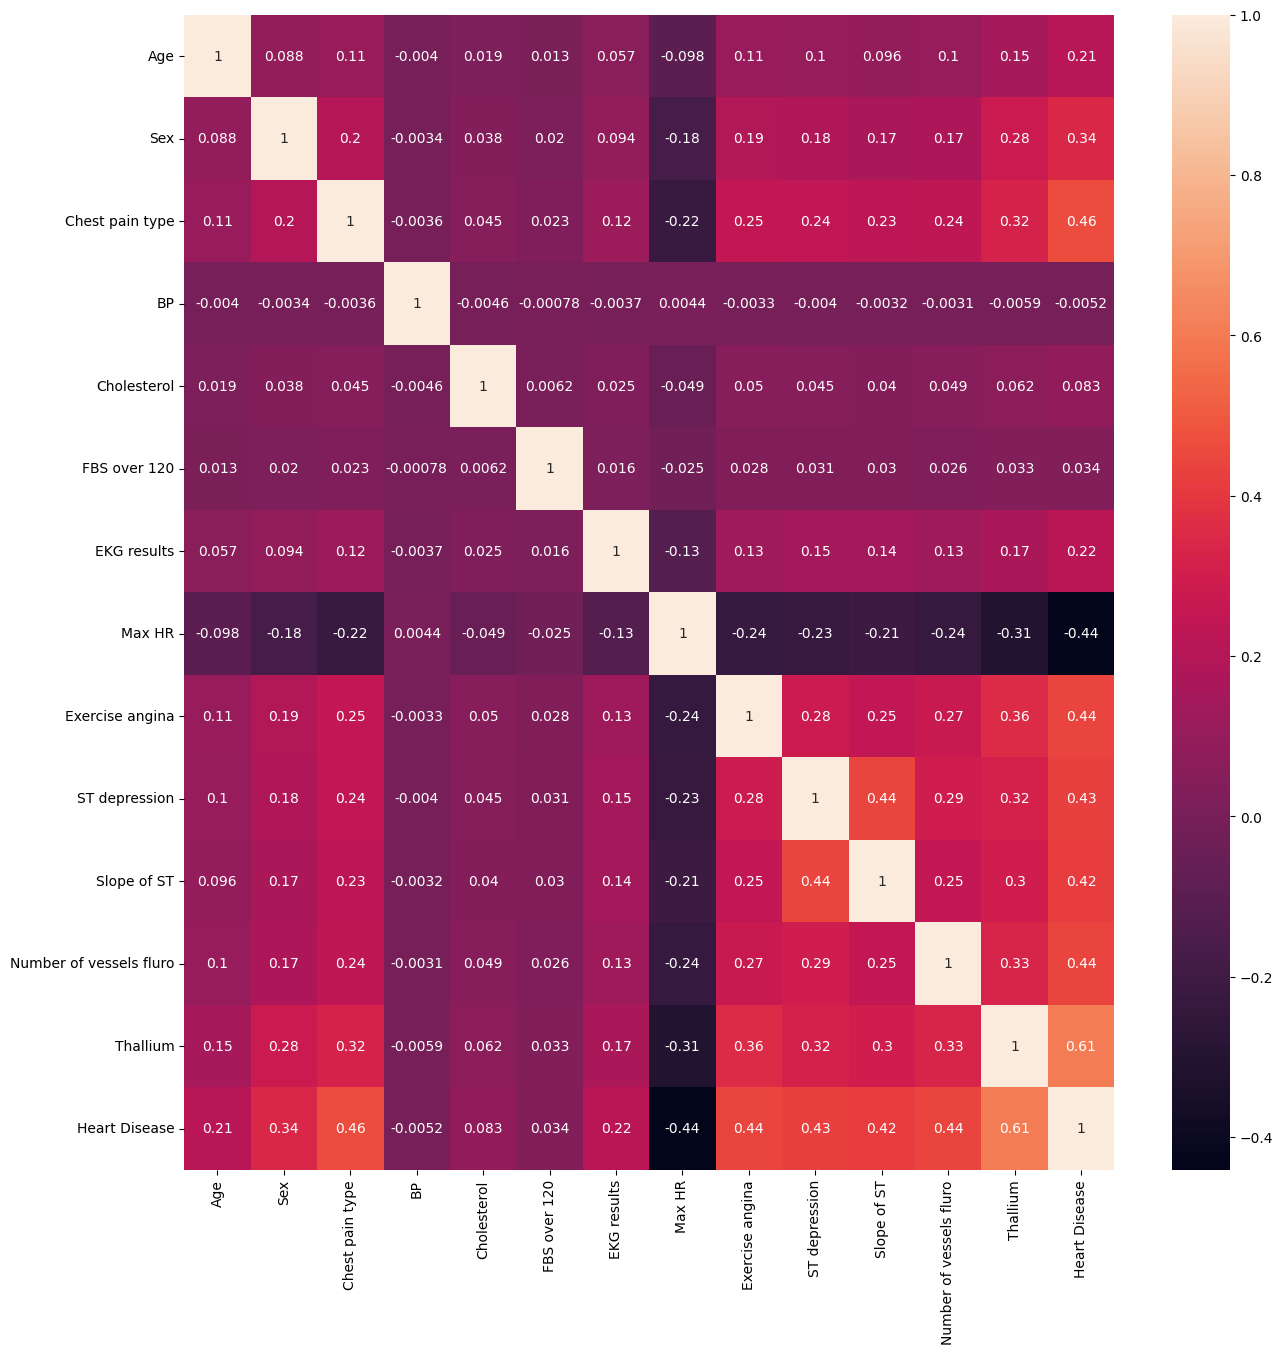

In [46]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(),annot=True)

In [53]:
train['BP'].mean()

130.49743333333333

In [55]:
train['BP'].median()

130.0